<a href="https://colab.research.google.com/github/AjayUnique/Health-Insurance-Cross-Sell-Prediction/blob/main/Copy_of_health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_theme(style="darkgrid")

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Capstone_Project_3/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df.info()
print()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB



id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

    There is no null value in datasets

# **Data Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


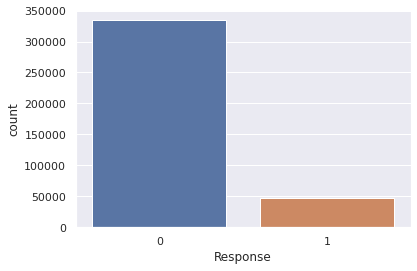

In [8]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Response'],data=df)



    * As we can see dataset is highly imbalance.



Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


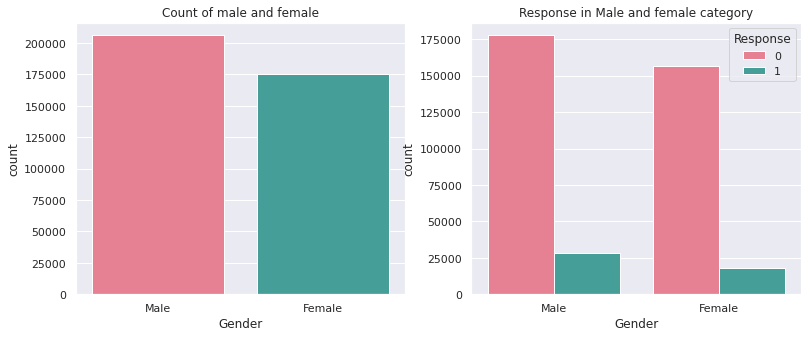

In [9]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(df['Gender'],palette='husl')
plt.title("Count of male and female")
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

Age vs Response

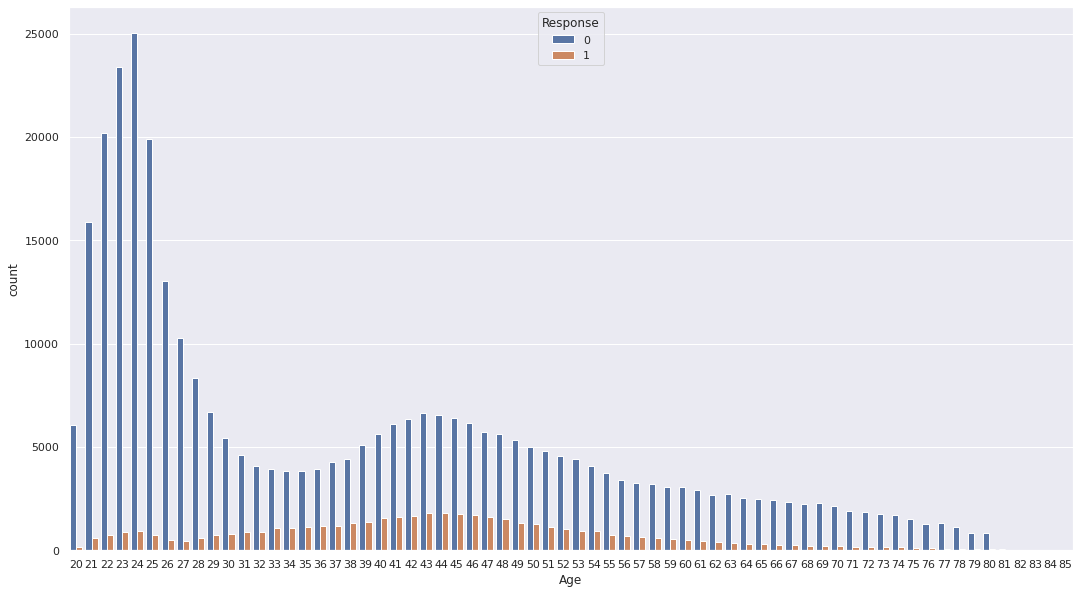

In [10]:
plt.figure(figsize=(18,10))
sns.countplot(x="Age",hue="Response",data=df)



*   People below age 30 are not interested to have insurance.
*   People having age between 30 to 60 are more interested to have vehicle insurance 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


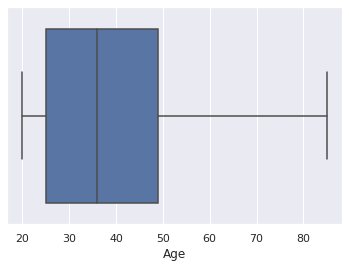

In [11]:
sns.boxplot(df['Age'])



*   There are no outliers.





**Driving License vs Response**

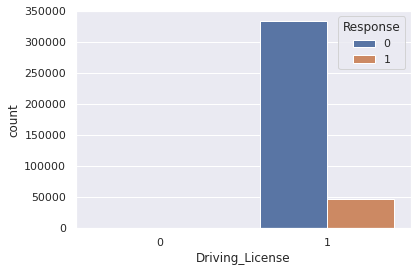

In [12]:
sns.countplot(x="Driving_License",hue="Response",data=df)

*  Customers who are interested in Vehicle Insurance almost all have driving license.




**Previously Insured vs Response** 

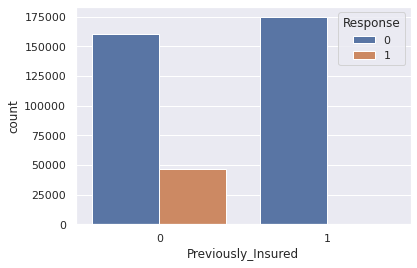

In [13]:
sns.countplot(x="Previously_Insured",hue="Response",data=df)



*  Customers not having previously insured are more likely to buy insurance.




**Vehicle damage vs Response**

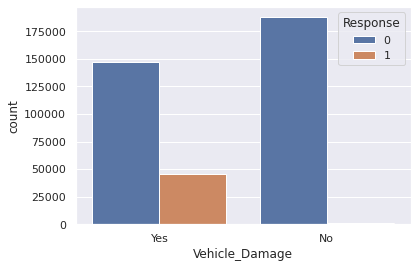

In [14]:
sns.countplot(x="Vehicle_Damage",hue="Response",data=df)

In [15]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Vehicle age vs Response**

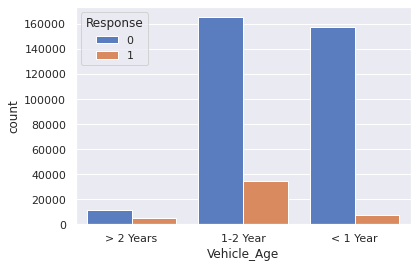

In [16]:
sns.countplot(x="Vehicle_Age",hue="Response",data=df,palette="muted")



*   Customers with vechicle age 1-2 years are more likely to interested as compared to the other two


*   Customers with Vehicle_Age <1 years have very less chance of buying Insurance



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


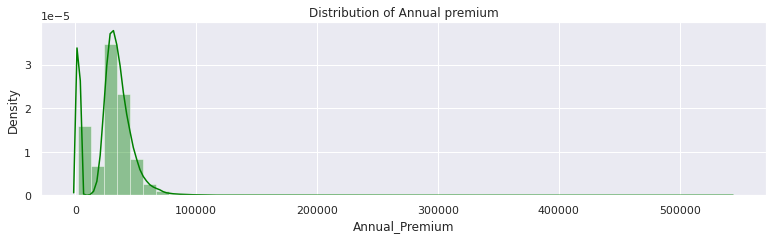

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


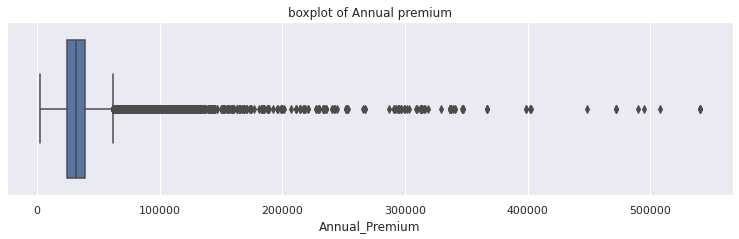

In [17]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()



*   From distribution plot we can see annual premium is rightly skewed.
*   From boxplot we can see there are too much outliers.



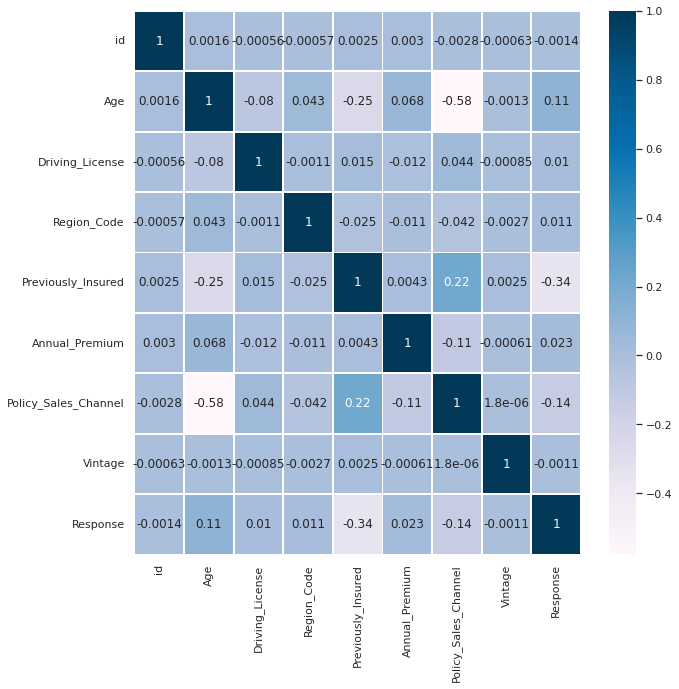

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.8,cmap='PuBu')
plt.show()



*   Target variable is not much affected by Vintage variable. we can drop least correlated variable.



# **Data Preparation**

Label Encoding 

In [19]:
labelEncoder=LabelEncoder()
df['Vehicle_Age']=labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage']=labelEncoder.fit_transform(df['Vehicle_Damage'])
df['Gender']=labelEncoder.fit_transform(df['Gender'])

In [20]:
df.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Checking duplicate rows

In [21]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []




*   No duplicate row found



Seperating target and independent variable

In [22]:
x=df.drop(['Response'],axis=1)
y=df['Response']

**Feature Selection**

[0.19314728 0.00564406 0.13989265 0.00047332 0.09362978 0.06005571
 0.01756164 0.07089061 0.16358067 0.06877445 0.18634982]


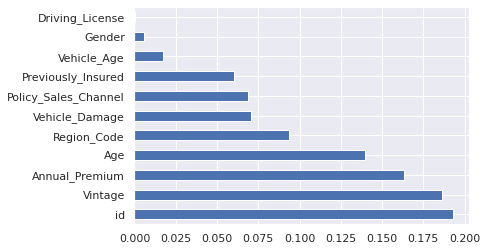

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feature_imp= pd.Series(model.feature_importances_,index=x.columns)
feature_imp.nlargest(11).plot(kind='barh')
plt.show()

We can drop least important features 

In [24]:
x=x.drop(['Driving_License','Gender'],axis=1)

**Handling Imbalanced data**

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


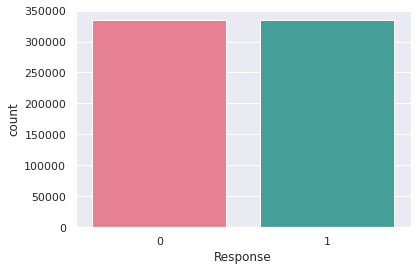

In [25]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

Spliting data into train and test data

# **Model Selection**

Problem can be verfiied as Binary classsification(whether customer goes for 

*   Problem can be verfiied as Binary classsification(whether customer goes for
vehicle insurance or not) 

*   Dataset have more than 300k records

*   We cannot go for SVM because it will take time for such huge dataset



*   Model we can go through are:


    1.   Logistic Regression
    2.   Random Forest
    3.   XGBClassifier
    


















**1. Logistic Regression**

In [38]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(468158, 9) (200640, 9) (468158,) (200640,)


In [39]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.783462918660287
ROC_AUC Score: 0.8333835611092648


In [40]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61506
           1       0.98      0.70      0.82    139134

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



**ROC Curve**

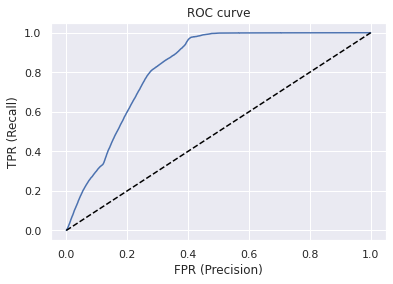

In [41]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(ytest,lr_probability)

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()


[[59194 41134]
 [ 2312 98000]]


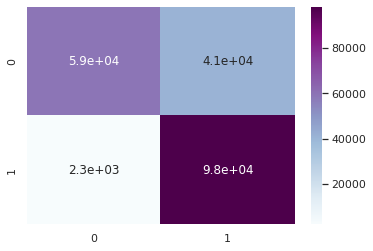

In [43]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

**2. RandomForest Classifier**



In [52]:
forest=RandomForestClassifier()
forest=forest.fit(xtrain,ytrain)
y_pred=forest.predict(xtest)
rf_prob=forest.predict_proba(xtest)[:,1]

AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)


0.9448365231259969
ROC_AUC Score: 0.949800132988099


In [53]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89786
           1       1.00      0.90      0.95    110854

    accuracy                           0.94    200640
   macro avg       0.94      0.95      0.94    200640
weighted avg       0.95      0.94      0.94    200640



**ROC Curve**

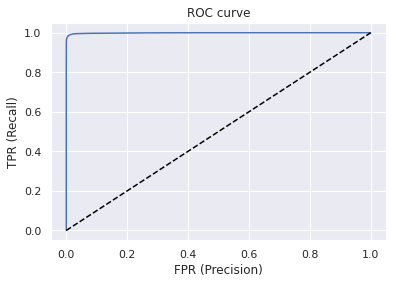

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, rf_prob)

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[66406 33922]
 [ 6849 93463]]


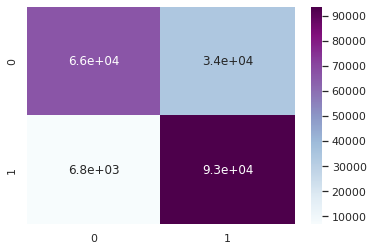

In [67]:
cm=confusion_matrix(ytest,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

**3. XGBClassifier**

In [63]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(xtrain,ytrain)
y_predict=xgb.predict(xtest)
xgb_prob=xgb.predict_proba(xtest)[:,1]

xgb_accuracy=accuracy_score(ytest,y_predict)
xgb_recall=recall_score(ytest,y_predict)
xgb_precision=precision_score(ytest,y_predict)
xgb_f1score=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)

print(accuracy_score(ytest,y_predict))
print("ROC_AUC Score:",AUC_xgb)


0.7967952551834131
ROC_AUC Score: 0.820104792880018


In [64]:

print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77     73255
           1       0.93      0.73      0.82    127385

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



[[66406 33922]
 [ 6849 93463]]


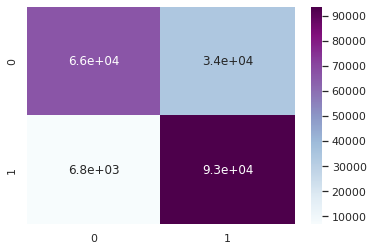

In [66]:
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **Comparing the model**

In [72]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,xgb_accuracy],"Recall":[recall_lr,recall_rf,xgb_recall],"Precision":[precision_lr,precision_rf,xgb_precision],"F1Score":[f1score_lr,f1score_rf,xgb_f1score],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
print(result)


                     Accuracy    Recall  Precision   F1Score   ROC_AUC
Logistic regression  0.783463  0.976952   0.704357  0.818556  0.833384
Randomforest         0.944837  0.997378   0.902529  0.947586  0.949800
XGBClassifier        0.796795  0.931723   0.733705  0.820942  0.820105
